# Exploratory Data Analysis

In [1]:
# Installs

!pip install pycountry_convert 
!pip install folium
!pip install calmap
!pip install altair

In [1]:
#Importing all modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import json, requests
import calmap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [8]:
# pip install plotly_express==0.4.0

     |████████████████████████████████| 13.1MB 5.2MB/s 
  Found existing installation: plotly 2.7.0
    Uninstalling plotly-2.7.0:
      Successfully uninstalled plotly-2.7.0


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import os

In [2]:
#loading file using read_csv
df_covid19=pd.read_csv('/content/drive/My Drive/capstone1/df_covid19.csv')
df_confirmed=pd.read_csv('/content/drive/My Drive/capstone1/df_confirmed.csv')
df_deaths=pd.read_csv('/content/drive/My Drive/capstone1/df_deaths.csv')


In [6]:
# #loading file using read_csv

# df_covid19=pd.read_csv('https://reeti2020.s3.amazonaws.com/df_covid19.csv')
# df_confirmed=pd.read_csv('https://reeti2020.s3.amazonaws.com/df_confirmed.csv')
# df_deaths=pd.read_csv('https://reeti2020.s3.amazonaws.com/df_deaths.csv')


In [3]:
df_covid19.describe()

Confirmed         Deaths  ...    New deaths  New recovered
count  5.453000e+04   54530.000000  ...  54530.000000   54530.000000
mean   7.024153e+04    2490.829837  ...     22.257803     575.611242
std    4.413285e+05   13095.315400  ...    121.786382    4296.485835
min    0.000000e+00       0.000000  ...  -1918.000000  -16298.000000
25%    2.100000e+01       0.000000  ...      0.000000       0.000000
50%    1.245000e+03      23.000000  ...      0.000000       1.000000
75%    1.491600e+04     302.000000  ...      3.000000      71.000000
max    9.382617e+06  232620.000000  ...   4143.000000  388340.000000

[8 rows x 10 columns]

## General Analysis of Data

Getting country wise and continent wise data.

In [4]:
#Getting continentwise data
today = str(date.today()+timedelta(days=-2))
print(today)
df_continents_cases = df_covid19.copy().drop(['country','Closed Cases','New cases','New deaths','New recovered'],axis =1)
df_continents_cases = df_continents_cases[ (df_continents_cases['Date'] == today)].sort_values("Confirmed",ascending=False)
df_continents_cases=df_continents_cases.drop('Date',axis=1).set_index('continent').groupby('continent').sum()

2020-11-03


In [6]:
df_continents_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active Cases"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Recovery Rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active Cases"])
                        
                  

## Countrywise reporting cases

In [7]:
df_countries_cases = df_covid19.copy().drop(['continent','Closed Cases','New cases','New deaths','New recovered'],axis =1)
df_countries_cases = df_countries_cases[ (df_countries_cases['Date'] == today)].sort_values("Confirmed",ascending=False)
df_countries_cases=df_countries_cases.drop('Date',axis=1).set_index('country')

In [9]:
#using style.background_gradient
#df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Wistia')

df_countries_cases.sort_values('Confirmed',ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active Cases"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Recovery Rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active Cases"])


## Top 10 countries Confirmed,Deaths,Active and recovered cases

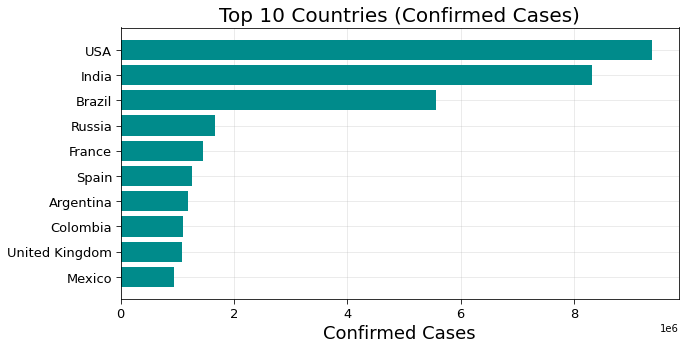

In [10]:
# plot bar of confirmed cases
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Confirmed Cases).png')

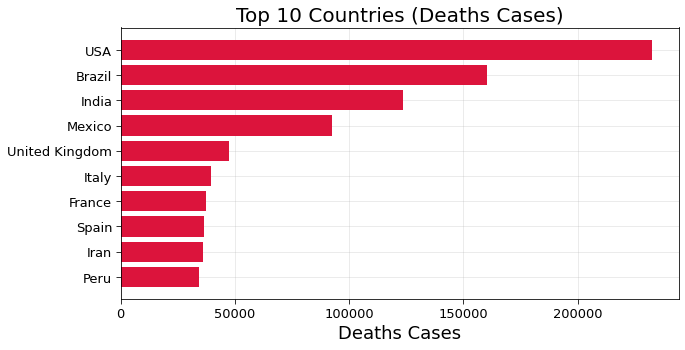

In [11]:
# plot bar of deaths cases
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')
#plt.savefig('Top 10 Countries (Deaths Cases).png')

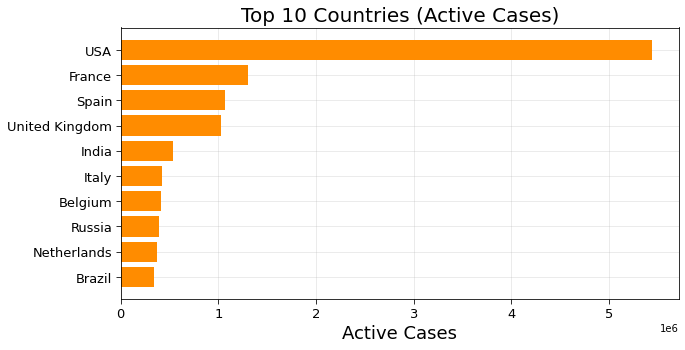

In [12]:
# plot bar of Active cases
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Active Cases')["Active Cases"].index[-10:],df_countries_cases.sort_values('Active Cases')["Active Cases"].values[-10:],color="darkorange")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("Top 10 Countries (Active Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')
plt.savefig('Top 10 Countries (Active Cases).png')

## Showing the coronavirus spreads¶

In [13]:
#First, let’s import the libraries, load data and select a list of countries and plot interactive plot of confirmed cases

import altair as alt
countries=['US','Brazil','Spain','Germany','China','Russia','India','United Kingdom','Japan']
selected_countries=df_covid19[df_covid19['country'].isin(countries)]
selected_countries=selected_countries.loc[(selected_countries['Date']>'2020-05-01') & (selected_countries['Date']<"2020-08-06")]
#Let’s create a circle chart to display the day wise confirmed cases cases of last 1month,

alt.Chart(selected_countries).mark_circle(filled=True).encode(
    x='monthdate(Date):O',
    y='country:O',
    color='country',
    size=alt.Size('Confirmed:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily confirmed cases:N')),
    tooltip = [alt.Tooltip('Confirmed')]
   
    
).properties(
    width=800,
    height=300
)
    


alt.Chart(...)

USA,Brazil and India cases are increasing day by day while spain and United Kingdom has uniform in nature. China Germany and Japan has tackled with pandemic as cases seems constant.

## US, India, Brazil and Russia

US and Brazil are experiencing the larger increase in Covid-19 positives in America. At the same time , India, which is secondmost populated country, has increase in the number of cases in short period of time in Asia. The fourth country we will study in this section is Russia which in Europe.

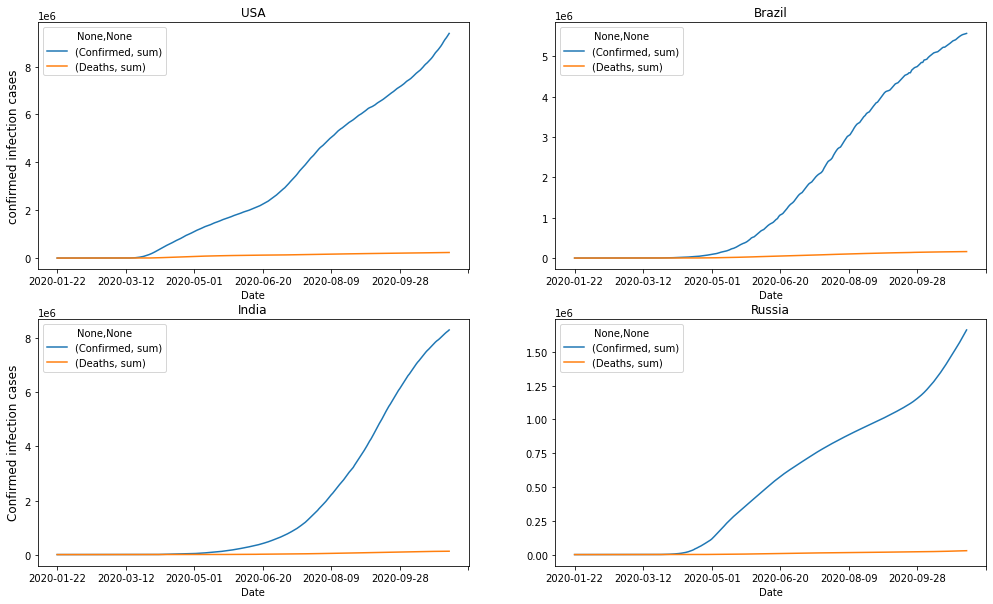

In [14]:
## US, India, Brazil and Russia
#US
confirmed_us = df_covid19[df_covid19['country']=='USA'].groupby(['Date']).agg({'Confirmed':['sum']})
death_us= df_covid19[df_covid19['country']=='USA'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_us = confirmed_us.join(death_us)
#Brazil
confirmed_brazil = df_covid19[df_covid19['country']=='Brazil'].groupby(['Date']).agg({'Confirmed':['sum']})
death_brazil= df_covid19[df_covid19['country']=='Brazil'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_brazil = confirmed_brazil.join(death_brazil)
#India
confirmed_india = df_covid19[df_covid19['country']=='India'].groupby(['Date']).agg({'Confirmed':['sum']})
death_india= df_covid19[df_covid19['country']=='India'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_india = confirmed_india.join(death_india)
#Russia
confirmed_russia = df_covid19[df_covid19['country']=='Russia'].groupby(['Date']).agg({'Confirmed':['sum']})
death_russia= df_covid19[df_covid19['country']=='Russia'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_russia = confirmed_russia.join(death_russia)

# plotting four countries
plt.figure(figsize=(17,10))
plt.subplot(2, 2, 1)
total_date_us.plot(ax=plt.gca(),title='USA')
plt.ylabel("confirmed infection cases",size=12)

plt.subplot(2, 2, 2)
total_date_brazil.plot(ax=plt.gca(),title="Brazil")

plt.subplot(2, 2, 3)
total_date_india.plot(ax=plt.gca(),title="India")
plt.ylabel("Confirmed infection cases",size=12)

plt.subplot(2, 2, 4)
total_date_russia.plot(ax=plt.gca(),title="Russia")

The current epidemic is in a very bad state right now. The number of cases are growing everyday. The entire nation is under lockdown due to the massive number of new cases being reported everyday.  There are currently close to 270667192 confirmed cases in USA.








## Correlation Analysis
plotting heat map of Confirmed,Death,Recovered,Mortality rate, recovery rate nad active cases

In [15]:
# Country wise correlation

df_countries_cases.iloc[:,:].corr().style.background_gradient(cmap='Reds').format("{:.3f}")

In [41]:
# Continent wise correlation
df_continents_cases.iloc[:,:].corr().style.background_gradient(cmap='Reds').format("{:.3f}")

## Visualization  of Map

In [16]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map.save("covid19.html")
world_map

In [17]:
# Convert date to string type
df_data = df_covid19.groupby(['Date', 'country'])['Confirmed', 'Deaths'].max().reset_index().fillna(0)
df_data["Date"] = pd.to_datetime( df_data["Date"]).dt.strftime('%m/%d/%Y')

fig = px.scatter_geo(df_data, locations="country", locationmode='country names', 
                     color=np.power(df_data["Confirmed"],0.3)-2 , size= np.power(df_data["Confirmed"]+1,0.3)-1, hover_name="country",
                     hover_data=['Confirmed'],
                     range_color= [0, max(np.power(df_data["Confirmed"],0.3))], 
                     projection="natural earth", animation_frame="Date", 
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title=f'COVID-19: Progression of spread'
                    )


fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=True)
fig.update_layout( margin={"r":0,"l":0,"b":0}, height=700,template='plotly_dark')
fig.show()
plt.savefig("COVID-19: Progression of spread")

<Figure size 432x288 with 0 Axes>

In [4]:
pip install plotly

In [18]:
# countrywise visual global spread in the world map using choropleth

fi_1 = px.choropleth(df_data, locations="country", locationmode='country names', 
                     color=np.power(df_data["Confirmed"],0.3)-2 , hover_name="country",
                     hover_data=["Confirmed"],
                     range_color= [0, max(np.power(df_data["Confirmed"],0.3))], 
                      animation_frame="Date",
                     color_continuous_scale=px.colors.sequential.Peach
                    )
fi_1.update_geos(fitbounds="locations", visible=True)
fi_1.update_coloraxes(colorscale="jet")
fi_1.update(layout_coloraxis_showscale=True)
fi_1.update_layout( margin={"r":0,"l":0,"b":0}, height=700,template='plotly_dark')

## Global confirmed cases Heat Map

In [19]:
temp_df = pd.DataFrame(df_countries_cases['Confirmed'])

temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["Confirmed"]), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Confirmed"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Confirmed Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Confirmed Cases(Log Scale)",colorscale="magma")
# fig.to_image("Global Heat Map confirmed.png")
fig.show()

## Global Deaths cases Heat Map¶

In [20]:
temp_df = pd.DataFrame(df_countries_cases['Deaths'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["Deaths"]+1), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Deaths"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Deaths Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Deaths (Log Scale)",colorscale='balance')
# fig.to_image("Global Heat Map deaths.png")
fig.show()

## Comparison of cases in Italy ,UK, Singapore and Spain

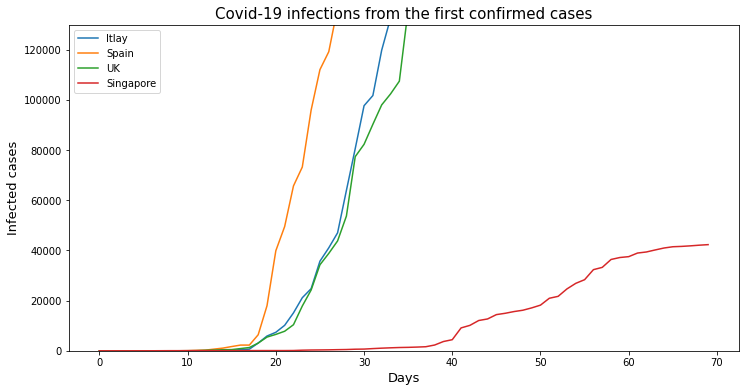

In [21]:
# Italy, UK, Singapore and Spain

#Italy
confirmed_total_date_Italy = df_covid19[(df_covid19['country']=='Italy') & df_covid19['Confirmed']!=0].groupby(['Date']).agg({'Confirmed':['sum']})
death_total_date_Italy = df_covid19[(df_covid19['country']=='Italy') & df_covid19['Confirmed']!=0].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(death_total_date_Italy)

#United Kingdom
confirmed_total_date_uk = df_covid19[(df_covid19['country']=='United Kingdom') & df_covid19['Confirmed']!=0].groupby(['Date']).agg({'Confirmed':['sum']})
death_total_date_uk = df_covid19[(df_covid19['country']=='United Kingdom') & df_covid19['Confirmed']!=0].groupby(['Date']).agg({'Deaths':['sum']})
total_date_uk = confirmed_total_date_uk.join(death_total_date_uk)

#Singapore
confirmed_total_date_singapore = df_covid19[(df_covid19['country']=='Singapore') & df_covid19['Confirmed']!=0].groupby(['Date']).agg({'Confirmed':['sum']})
death_total_date_singapore = df_covid19[(df_covid19['country']=='Singapore') & df_covid19['Confirmed']!=0].groupby(['Date']).agg({'Deaths':['sum']})
total_date_singapore = confirmed_total_date_singapore.join(death_total_date_singapore)

#Spain
confirmed_total_date_spain = df_covid19[(df_covid19['country']=='Spain') & df_covid19['Confirmed']!=0].groupby(['Date']).agg({'Confirmed':['sum']})
death_total_date_spain = df_covid19[(df_covid19['country']=='Spain') & df_covid19['Confirmed']!=0].groupby(['Date']).agg({'Deaths':['sum']})
total_date_spain = confirmed_total_date_spain.join(death_total_date_spain)

# using list comphresion to draw first 70 days data

italy = [i for i in total_date_Italy.Confirmed['sum'].values]
italy_30 = italy[0:70] 
spain = [i for i in total_date_spain.Confirmed['sum'].values]
spain_30 = spain[0:70] 
UK = [i for i in total_date_uk.Confirmed['sum'].values]
UK_30 = UK[0:70] 
singapore = [i for i in total_date_singapore.Confirmed['sum'].values]
singapore_30 = singapore[0:70] 

#plots

plt.figure(figsize=(12,6))
plt.plot(italy_30)
plt.plot(spain_30)
plt.plot(UK_30)
plt.plot(singapore_30)
plt.legend(['Itlay','Spain','UK','Singapore'],loc='upper left')
plt.title("Covid-19 infections from the first confirmed cases"  ,size =15)
plt.xlabel("Days",size=13)
plt.ylabel("Infected cases", size=13)
plt.ylim(0,130000)
plt.show()




## Movering average of 14 days of world covid19 confirmed and Death cases

In [22]:
cols =df_confirmed.keys()
confirmed =df_confirmed.loc[:, cols[4]:cols[-1]]
deaths = df_deaths.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()


world_cases = []
total_deaths = [] 
mortality_rate = []
total_active = [] 

china_cases = [] 
us_cases = [] 


china_deaths = [] 
us_deaths = [] 


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    
    
    china_cases.append(df_confirmed[df_confirmed['country']=='China'][i].sum())
    us_cases.append(df_confirmed[df_confirmed['country']=='US'][i].sum())
    
    
    china_deaths.append(df_deaths[df_deaths['country']=='China'][i].sum())
    us_deaths.append(df_deaths[df_deaths['country']=='US'][i].sum())
    
    
    
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 


def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 14


# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

china_daily_increase = daily_increase(china_cases)
us_daily_increase = daily_increase(us_cases)  


# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

china_daily_death = daily_increase(china_deaths)
us_daily_death = daily_increase(us_deaths) 


    
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
#future forecast
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]
    


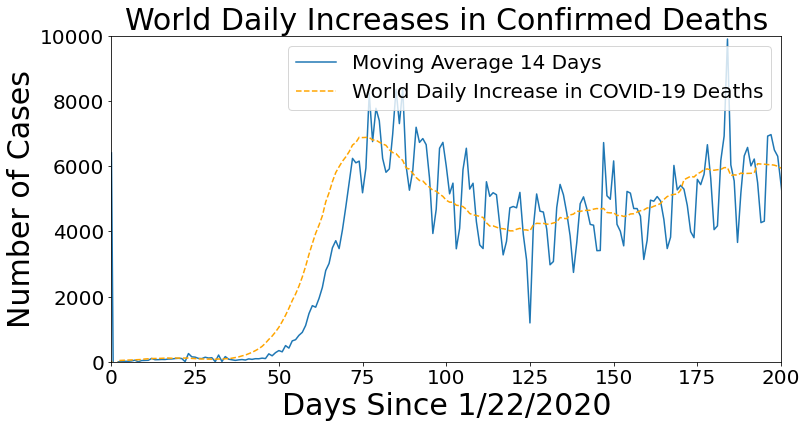

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Moving Average 14 Days', 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlim(0,200)
plt.ylim(0,10000)
plt.show()

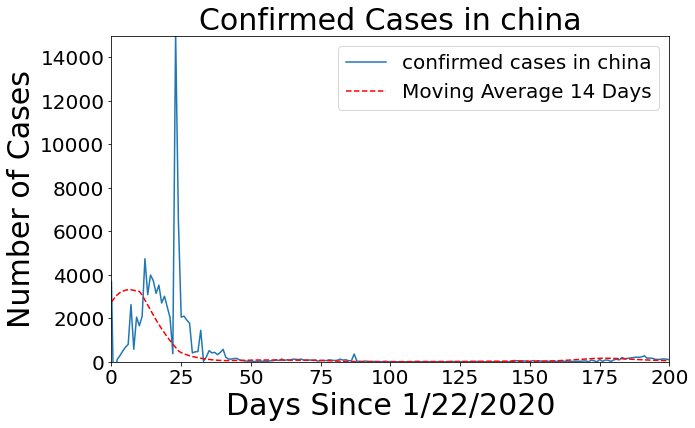

<Figure size 432x288 with 0 Axes>

In [24]:
#plotting China cases
confirmed_avg = moving_average(china_daily_increase, window)
confirmed_increase_avg = moving_average(confirmed_avg, window)
plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates,china_daily_increase)
plt.plot(adjusted_dates,confirmed_increase_avg , color='red', linestyle='dashed')
plt.title( "Confirmed Cases in china", size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['confirmed cases in china', 'Moving Average 14 Days'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlim(0,200)
plt.ylim(0,15000)
plt.show()
plt.savefig("Confirmed cases in China")

China has been able to "flatten the curve" looking at their graphs of Confirmed Cases.

## Daily increase in different types of Cases"

In [25]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
df_dataa=df_covid19.groupby("Date").agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_dataa.index, y=df_dataa["Confirmed"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df_dataa.index, y=df_dataa["Recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=df_dataa.index, y=df_dataa["Deaths"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

 now, we will study about south korea ,germany,australia and Newzealand  cases

## South Korea

In [26]:
df_skorea = df_covid19[df_covid19['country']=='South Korea'].groupby(['Date']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

df_germany=df_covid19[df_covid19['country']=='Germany'].groupby(['Date']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

df_Newzealand=df_covid19[df_covid19['country']=='New Zealand'].groupby(['Date']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

df_australia=df_covid19[df_covid19['country']=='Australia'].groupby(['Date']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})


# plotting for South Korea

fig=go.Figure()
fig.add_trace(go.Scatter(x=df_skorea.index, y=df_skorea["Confirmed"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df_skorea.index, y=df_skorea["Recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=df_skorea.index, y=df_skorea["Deaths"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Different types of Cases in South Korea",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()



# plotting for Germany

fig=go.Figure()
fig.add_trace(go.Scatter(x=df_germany.index, y=df_germany["Confirmed"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df_germany.index, y=df_germany["Recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=df_germany.index, y=df_germany["Deaths"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Different types of Cases germany",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()



# plotting for Australia

fig=go.Figure()
fig.add_trace(go.Scatter(x=df_australia.index, y=df_australia["Confirmed"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df_australia.index, y=df_australia["Recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=df_australia.index, y=df_australia["Deaths"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Different types of Cases Australia",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()




# plotting for New Zealand

fig=go.Figure()
fig.add_trace(go.Scatter(x=df_Newzealand.index, y=df_Newzealand["Confirmed"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df_Newzealand.index, y=df_Newzealand["Recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=df_Newzealand.index, y=df_Newzealand["Deaths"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Different types of Cases New Zealand",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


We can see Australia ,Newzealand and south korea tackled with pandemic ,,while germany has again surge in cases after decrease of cases.

Although ,the cases are increasing ,deaths are considerably low.

## Mortality and Recovery Rate 

In [27]:
#Plotting Mortality and Recovery Rate 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
df_dataa= df_covid19.groupby("Date").agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=df_dataa.index, y=(df_dataa["Recovered"]/df_dataa["Confirmed"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df_dataa.index, y=(df_dataa["Deaths"]/df_dataa["Confirmed"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()
plt.savefig("recovery rate")

<Figure size 432x288 with 0 Axes>

## Comparision of Covid_19 confirmed cases :China vs rest of world

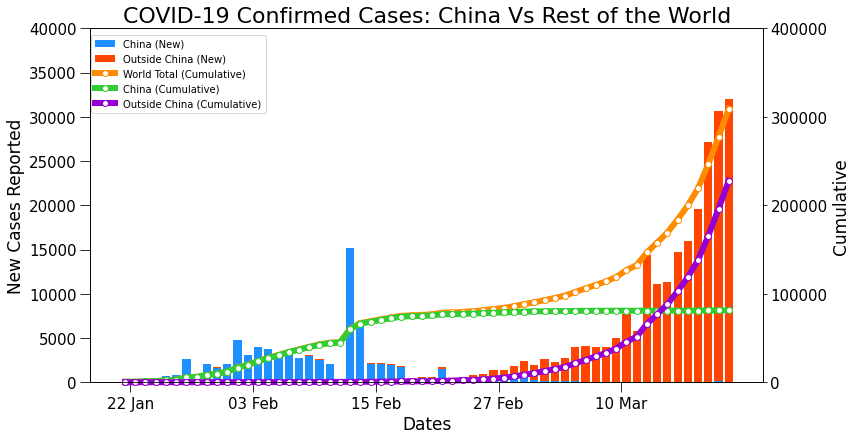

In [28]:
#Getting data for China and Oouside China
#df - Cumulative data for china, outside china and world total  (confirmed cases)
#df_newcases- new cases reported per day  (confirmed cases)

df_confirmed_report =df_confirmed.iloc[:,:65].copy()
df_confirmed_report.loc[df_confirmed_report['country'] != "China","country"] = "Outside China"
df_confirmed_report = df_confirmed_report.groupby("country").sum().drop(["Lat","Long"],axis =1)
df_confirmed_report.loc["Total"] = df_confirmed_report.sum()
df_confirmed_newcases = df_confirmed_report.groupby(level =0).diff(axis =1)
df_confirmed_newcases = df_confirmed_newcases.replace(np.nan, 0, regex=True) 
f = plt.figure(figsize=(12,6))
ax1 = f.add_subplot(111)

ax1.bar(df_confirmed_report[df_confirmed_report.index == "China"].columns,df_confirmed_newcases[df_confirmed_newcases.index == "China"].values[0], label = "China (New)",color='dodgerblue')
ax1.bar(df_confirmed_report[df_confirmed_report.index == "Outside China"].columns,df_confirmed_newcases[df_confirmed_newcases.index == "Outside China"].values[0],bottom=df_confirmed_newcases[df_confirmed_newcases.index == "China"].values[0],label = "Outside China (New)",color='orangered')

# Labels
ax1.set_xlabel("Dates",fontsize=17)
ax1.set_ylabel("New Cases Reported",fontsize =17)

ax1.tick_params(size=10,labelsize=15)
length = len(df_confirmed_report.columns)
ax1.set_xticks(np.arange(0.5, length, int(length/5)))
ax1.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_confirmed_report.columns][::int(length/5)],fontsize=15)
l = np.arange(0, df_confirmed_report.max(axis = 1)[2]/10+10000, 5000)
ax1.set_yticks(l[::int(len(l)/5)])
# ax1.spines['bottom'].set_position('zero')
ax2 = ax1.twinx()
marker_style = dict(linewidth=6, linestyle='-', marker='o',markersize=6, markerfacecolor='#ffffff')

ax2.plot(df_confirmed_report[df_confirmed_report.index == "Total"].columns ,df_confirmed_report[df_confirmed_report.index == "Total"].values[0],**marker_style,label = "World Total (Cumulative)",color="darkorange",clip_on=False)
ax2.plot(df_confirmed_report[df_confirmed_report.index == "China"].columns ,df_confirmed_report[df_confirmed_report.index == "China"].values[0],**marker_style,label = "China (Cumulative)",color="limegreen",clip_on=False)
ax2.plot(df_confirmed_report[df_confirmed_report.index == "Outside China"].columns ,df_confirmed_report[df_confirmed_report.index == "Outside China"].values[0],**marker_style,label ="Outside China (Cumulative)",color="darkviolet",clip_on=False)
ax2.bar([0],[0])

# Label
ax2.tick_params(labelsize=15)
ax2.set_ylabel("Cumulative",fontsize =17)
ax2.set_xticks(np.arange(0.5, length, int(length/5)))
ax2.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_confirmed_report.columns][::int(length/5)],fontsize=15)
l = np.arange(0, df_confirmed_report.max(axis = 1)[2]+100000, 100000)
ax2.set_yticks(l[::int(len(l)/5)])

f.tight_layout()
f.legend(loc = "upper left", bbox_to_anchor=(0.1,0.95))
plt.title("COVID-19 Confirmed Cases: China Vs Rest of the World",fontsize = 22)
plt.savefig('China vs Rest of the world.png')
plt.show()



 
## USA
As usa has increased cases allover the world,so I am plotting all cases in usa.

In [29]:

usa_data=df_covid19[df_covid19["country"]=="USA"]
datewise_usa=usa_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [30]:
#plot
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_usa.index, y=datewise_usa["Confirmed"].diff().fillna(0),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_usa.index, y=datewise_usa["Recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_usa.index, y=datewise_usa["Deaths"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of cases in usa",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Eventhough ,the number of cases are increasing we can see deaths are decreased in usa.

## Clustering of Countries

The clustering of countries can be done considering different features. Here I'm trying to cluster different countries based on the Mortality and Recovery rate of indivisual country.

As we all are well aware that COVID-19 has different Mortality Rate among different countries based on different factors and so is the Recovery Rate because of pandemic controlling practices followed by the individual country. Also Mortality Rate and Recovery Rate both togther takes into account all types of cases Confirmed, Recoverd and Deaths.

Let's checkout how these clusters look like!

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X=df_covid19[["Mortality Rate","Recovery Rate"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
std= StandardScaler()
X=std.fit_transform(X) 

In [32]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Elbow Method')

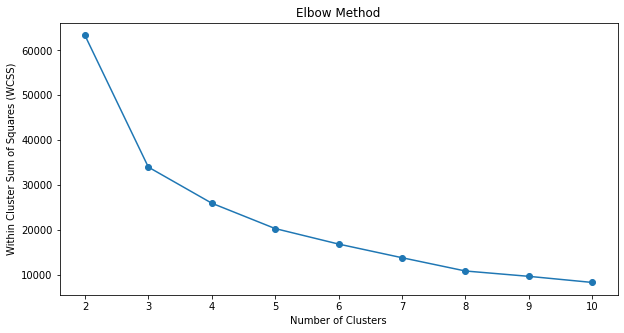

In [35]:
x=np.arange(2,11)
plt.figure(figsize=(10,5))
plt.plot(x,wcss,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method")

In [36]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)
df_covid19["Clusters"]=clf_final.predict(X)

In [37]:
## SUMMARY OF CLUSTERS
print("Few Countries belonging to Cluster 0: ",list(df_covid19[df_covid19["Clusters"]==0].head(10)['country']))
print("Few Countries belonging to Cluster 1: ",list(df_covid19[df_covid19["Clusters"]==1].head(10)['country']))
print("Few Countries belonging to Cluster 2: ",list(df_covid19[df_covid19["Clusters"]==2].head(10)['country']))


Few Countries belonging to Cluster 0:  ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria']
Few Countries belonging to Cluster 1:  ['Philippines', 'Philippines', 'Philippines', 'Philippines', 'Philippines', 'Philippines', 'Philippines', 'Philippines', 'Philippines', 'Philippines']
Few Countries belonging to Cluster 2:  ['Sri Lanka', 'Sri Lanka', 'Sri Lanka', 'Sri Lanka', 'Cambodia', 'Finland', 'Nepal', 'Russia', 'Sri Lanka', 'Australia']


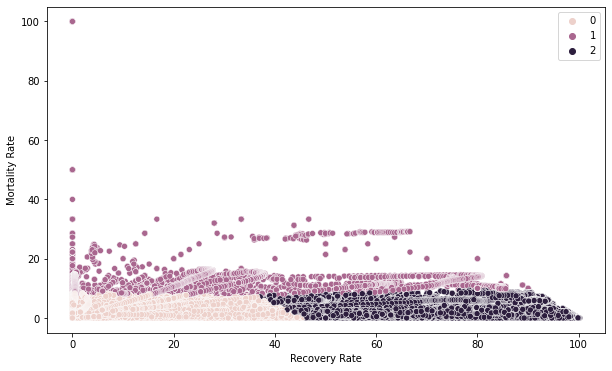

In [38]:
#scatter plots
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot( x=df_covid19["Recovery Rate"], y=df_covid19["Mortality Rate"], hue=df_covid19["Clusters"])
plt.legend()               
plt.show()



In [39]:
print("Avergae Mortality Rate of Cluster 0: ",df_covid19[df_covid19["Clusters"]==0]["Mortality Rate"].mean())
print("Avergae Recovery Rate of Cluster 0: ",df_covid19[df_covid19["Clusters"]==0]["Recovery Rate"].mean())
print("Avergae Mortality Rate of Cluster 1: ",df_covid19[df_covid19["Clusters"]==1]["Mortality Rate"].mean())
print("Avergae Recovery Rate of Cluster 1: ",df_covid19[df_covid19["Clusters"]==1]["Recovery Rate"].mean())
print("Avergae Mortality Rate of Cluster 2: ",df_covid19[df_covid19["Clusters"]==2]["Mortality Rate"].mean())
print("Avergae Recovery Rate of Cluster 2: ",df_covid19[df_covid19["Clusters"]==2]["Recovery Rate"].mean())

Avergae Mortality Rate of Cluster 0:  1.2491995002387482
Avergae Recovery Rate of Cluster 0:  9.712264420170435
Avergae Mortality Rate of Cluster 1:  14.412140822303543
Avergae Recovery Rate of Cluster 1:  34.007780804294484
Avergae Mortality Rate of Cluster 2:  2.3314399216223194
Avergae Recovery Rate of Cluster 2:  77.25196861600196


Cluster 2 is a set of countries which have really High Mortality Rate and consdierably Good Recovery Rate. Basically few countries among these clusters have seen already the worst of this pandemic but are now recovering with healty Recovery Rate.

Cluster 0 is set of countries which have Low Mortality Rate and really High Recovery Rate. These are the set of countries who has been able to control the COVID-19 by following pandemic controlling practices rigorously.

Cluster 1 is set of countries which have Low Mortality Rate and Low Recovery Rate. These countries need to pace up their Revovery Rate to get out it, Some thses countries have really high number of Infected Cases but Low Mortality is positive sign out of it.

## COVID19:USA

In [40]:
date_usa = datetime.strptime(df_confirmed.columns[-1],'%m/%d/%y').strftime("%m-%d-%Y")
df_temp = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+date_usa+".csv")
df_usa = df_temp.loc[df_temp["Country_Region"]== "US"]
df_usa = df_usa.rename(columns={"Admin2":"County"})

In [41]:
df_usa

FIPS      County  ... Incidence_Rate Case-Fatality_Ratio
634    1001.0     Autauga  ...    3932.413324            1.411015
635    1003.0     Baldwin  ...    3133.483251            1.057898
636    1005.0     Barbour  ...    4350.644090            0.837989
637    1007.0        Bibb  ...    3974.278825            1.685393
638    1009.0      Blount  ...    3738.802615            1.156337
...       ...         ...  ...            ...                 ...
3901  56039.0       Teton  ...    3673.712922            0.232019
3902  56041.0       Uinta  ...    2521.506971            0.588235
3903  90056.0  Unassigned  ...            NaN            0.000000
3904  56043.0    Washakie  ...    2139.654068            4.191617
3905  56045.0      Weston  ...    2612.963765            0.000000

[3272 rows x 14 columns]

In [42]:
df_usa.loc[:,["Confirmed","Deaths","Province_State"]].groupby(["Province_State"]).sum().sort_values("Confirmed",ascending=False).style.background_gradient(cmap='Blues',subset=["Confirmed"]).background_gradient(cmap='Reds',subset=["Deaths"])

## TOP affected Cities or counties

In [43]:
df_usa.loc[:,['Province_State','Confirmed',"Deaths","County"]].sort_values("Confirmed",ascending=False).set_index("County")[:10].style.background_gradient(cmap='Blues',subset=["Confirmed"])\
.background_gradient(cmap='Reds',subset=["Deaths"])

## Top 10 states :USA(Confirmed Cases)

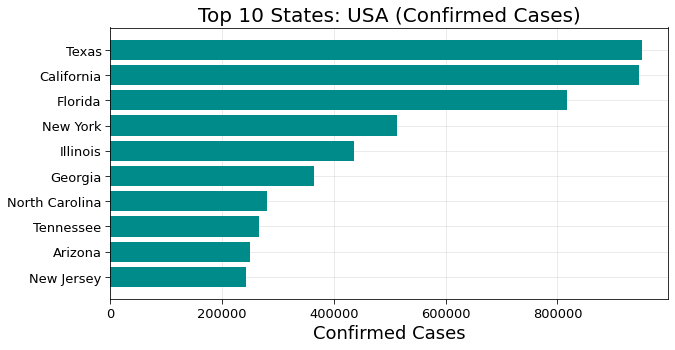

In [44]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_usa.groupby(["Province_State"]).sum().sort_values('Confirmed')["Confirmed"].index[-10:],df_usa.groupby(["Province_State"]).sum().sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: USA (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 States_USA (Confirmed Cases).png')

## Top 10 States :USA(Deaths Cases)

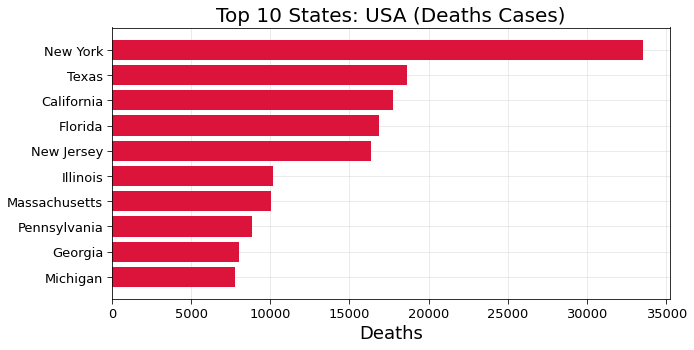

In [45]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_usa.groupby(["Province_State"]).sum().sort_values('Deaths')["Deaths"].index[-10:],df_usa.groupby(["Province_State"]).sum().sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("Top 10 States: USA (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 States_USA (Deaths Cases).png')

Most of cases are in the eastern part of usa and moderately in the west.